This complete implementation:

Downloads data directly from your GitHub URL

Creates separate code blocks for each analysis section

Saves all plots as both PNG and PDF files

Exports all analysis results as CSV files

Creates a downloadable zip archive with all results

Provides comprehensive documentation for all outputs

Just run each code block sequentially to perform the complete analysis and generate all downloadable files!

1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Create directories for saving files
os.makedirs('plots', exist_ok=True)
os.makedirs('data_output', exist_ok=True)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data directly from GitHub
github_url = 'https://raw.githubusercontent.com/Electricalelectronicsfinland/Introduction-to-Big-Data-Analytics-TX00EX95-3002/refs/heads/main/football_18-19-mATI.csv'

try:
    # Read the CSV file directly from GitHub
    df = pd.read_csv(github_url)
    
    print("✅ Data loaded successfully from GitHub!")
    print(f"Dataset shape: {df.shape}")
    
    # Save the loaded data as CSV
    df.to_csv('data_output/original_data.csv', index=False)
    print("💾 Original data saved as 'data_output/original_data.csv'")
    
except Exception as e:
    print(f"❌ Error loading file from GitHub: {e}")
    exit()

# Display basic info
print("\n📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 3 rows:")
print(df.head(3))
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Save basic info to file
with open('data_output/dataset_info.txt', 'w') as f:
    f.write("Dataset Overview\n")
    f.write("================\n")
    f.write(f"Shape: {df.shape}\n")
    f.write(f"Columns: {df.columns.tolist()}\n")
    f.write(f"Missing values:\n{df.isnull().sum()}\n")

✅ Data loaded successfully from GitHub!
Dataset shape: (180, 23)
💾 Original data saved as 'data_output/original_data.csv'

📊 Dataset Overview:
Shape: (180, 23)
Columns: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

First 3 rows:
  Div      Date HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ... HST  \
0  E0  1/1/2019  Arsenal     Fulham     4     1   H     1     0   H  ...   9   
1  E0  1/1/2019  Cardiff  Tottenham     0     3   A     0     3   A  ...   3   
2  E0  1/1/2019  Everton  Leicester     0     1   A     0     0   D  ...   2   

   AST  HF  AF  HC  AC  HY  AY  HR  AR  
0    4   7  12   8   3   0   1   0   0  
1    4   6   6   5   3   1   0   0   0  
2    4   5   8   6   5   3   1   0   0  

[3 rows x 23 columns]

Data types:
Div         object
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR       

2. Basic Statistics and Data Exploration

In [2]:
# Basic statistics
print("\n📈 Basic Statistics:")
basic_stats = df.describe()
print(basic_stats)

# Save basic statistics
basic_stats.to_csv('data_output/basic_statistics.csv')
print("💾 Basic statistics saved as 'data_output/basic_statistics.csv'")

# Data quality check
print("\n🔍 Data Quality Check:")
print(f"Total matches: {len(df)}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique teams: {len(set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique()))}")
print(f"Unique referees: {df['Referee'].nunique()}")

# Save data quality report
quality_report = {
    'Total Matches': len(df),
    'Date Range Start': df['Date'].min(),
    'Date Range End': df['Date'].max(),
    'Unique Teams': len(set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())),
    'Unique Referees': df['Referee'].nunique()
}
pd.DataFrame.from_dict(quality_report, orient='index', columns=['Value']).to_csv('data_output/data_quality_report.csv')
print("💾 Data quality report saved as 'data_output/data_quality_report.csv'")


📈 Basic Statistics:
                      Date        FTHG        FTAG        HTHG        HTAG  \
count                  180  180.000000  180.000000  180.000000  180.000000   
mean   2019-03-10 04:24:00    1.605556    1.188889    0.622222    0.522222   
min    2019-01-01 00:00:00    0.000000    0.000000    0.000000    0.000000   
25%    2019-02-02 00:00:00    1.000000    0.000000    0.000000    0.000000   
50%    2019-03-09 00:00:00    1.000000    1.000000    0.000000    0.000000   
75%    2019-04-15 06:00:00    2.000000    2.000000    1.000000    1.000000   
max    2019-05-12 00:00:00    6.000000    5.000000    4.000000    3.000000   
std                    NaN    1.292424    1.185522    0.840029    0.720456   

               HS          AS         HST         AST          HF          AF  \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean    14.333333   11.211111    4.738889    3.744444    9.622222    9.838889   
min      0.000000    2.000000    

3. Match Results Distribution Analysis


📊 Creating Match Results Visualizations...


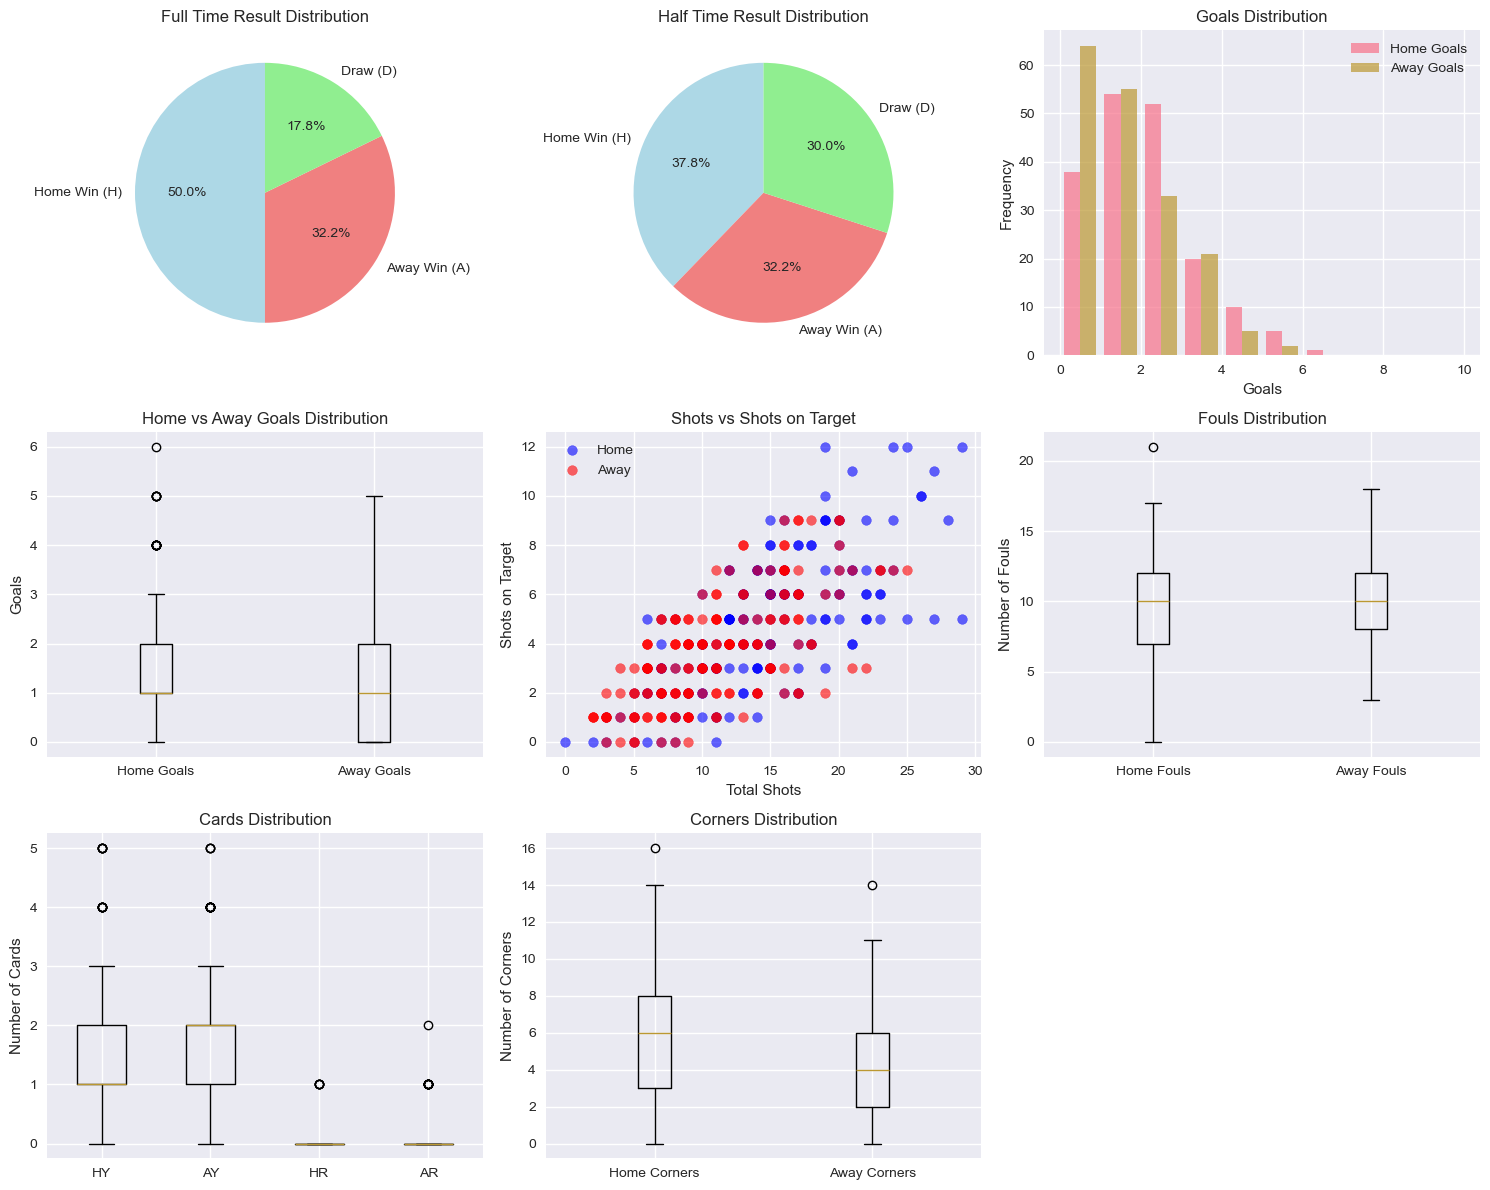

💾 Match results visualizations saved in 'plots/' directory
💾 Match results summary saved as 'data_output/match_results_summary.csv'
💾 Detailed results distribution saved as 'data_output/detailed_results_distribution.csv'


In [3]:
print("\n📊 Creating Match Results Visualizations...")
plt.figure(figsize=(15, 12))

# Full Time Result distribution
plt.subplot(3, 3, 1)
result_counts = df['FTR'].value_counts()
colors = ['lightblue', 'lightcoral', 'lightgreen']
plt.pie(result_counts.values, labels=['Home Win (H)', 'Away Win (A)', 'Draw (D)'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Full Time Result Distribution')

# Half Time Result distribution
plt.subplot(3, 3, 2)
htr_counts = df['HTR'].value_counts()
plt.pie(htr_counts.values, labels=['Home Win (H)', 'Away Win (A)', 'Draw (D)'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Half Time Result Distribution')

# Goals distribution
plt.subplot(3, 3, 3)
plt.hist([df['FTHG'], df['FTAG']], bins=range(0, 11), 
         label=['Home Goals', 'Away Goals'], alpha=0.7)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Goals Distribution')
plt.legend()

# Home vs Away goals comparison
plt.subplot(3, 3, 4)
goals_data = [df['FTHG'], df['FTAG']]
plt.boxplot(goals_data, labels=['Home Goals', 'Away Goals'])
plt.title('Home vs Away Goals Distribution')
plt.ylabel('Goals')

# Shots analysis
plt.subplot(3, 3, 5)
plt.scatter(df['HS'], df['HST'], alpha=0.6, label='Home', c='blue')
plt.scatter(df['AS'], df['AST'], alpha=0.6, label='Away', c='red')
plt.xlabel('Total Shots')
plt.ylabel('Shots on Target')
plt.title('Shots vs Shots on Target')
plt.legend()

# Fouls analysis
plt.subplot(3, 3, 6)
fouls_data = [df['HF'], df['AF']]
plt.boxplot(fouls_data, labels=['Home Fouls', 'Away Fouls'])
plt.title('Fouls Distribution')
plt.ylabel('Number of Fouls')

# Cards analysis
plt.subplot(3, 3, 7)
cards_data = [df['HY'], df['AY'], df['HR'], df['AR']]
plt.boxplot(cards_data, labels=['HY', 'AY', 'HR', 'AR'])
plt.title('Cards Distribution')
plt.ylabel('Number of Cards')

# Corners analysis
plt.subplot(3, 3, 8)
corners_data = [df['HC'], df['AC']]
plt.boxplot(corners_data, labels=['Home Corners', 'Away Corners'])
plt.title('Corners Distribution')
plt.ylabel('Number of Corners')

plt.tight_layout()
plt.savefig('plots/match_results_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/match_results_analysis.pdf', bbox_inches='tight')
plt.show()
print("💾 Match results visualizations saved in 'plots/' directory")

# CORRECTED: Save match results data - Fixed the dictionary structure
match_results_summary = pd.DataFrame({
    'Metric': [
        'Home Wins', 'Away Wins', 'Draws', 
        'Average Home Goals', 'Average Away Goals', 'Total Goals'
    ],
    'Value': [
        result_counts.get('H', 0),
        result_counts.get('A', 0), 
        result_counts.get('D', 0),
        df['FTHG'].mean(),
        df['FTAG'].mean(),
        df['FTHG'].sum() + df['FTAG'].sum()
    ]
})

match_results_summary.to_csv('data_output/match_results_summary.csv', index=False)
print("💾 Match results summary saved as 'data_output/match_results_summary.csv'")

# Also save the detailed results distribution
detailed_results = pd.DataFrame({
    'Result Type': ['Home Win (H)', 'Away Win (A)', 'Draw (D)'],
    'Count': [result_counts.get('H', 0), result_counts.get('A', 0), result_counts.get('D', 0)],
    'Percentage': [
        result_counts.get('H', 0) / len(df) * 100,
        result_counts.get('A', 0) / len(df) * 100, 
        result_counts.get('D', 0) / len(df) * 100
    ]
})
detailed_results.to_csv('data_output/detailed_results_distribution.csv', index=False)
print("💾 Detailed results distribution saved as 'data_output/detailed_results_distribution.csv'")

4. Team Performance Analysis


🏆 Analyzing Team Performance...

📋 Premier League 2018-19 Standings:
                Games  Wins  Draws  Losses  Points  GoalsFor  GoalsAgainst  \
Man City         18.0  17.0    0.0     1.0    51.0      41.0           7.0   
Liverpool        18.0  13.0    4.0     1.0    43.0      41.0          14.0   
Arsenal          18.0  10.0    2.0     6.0    32.0      31.0          21.0   
Man United       18.0   9.0    4.0     5.0    31.0      24.0          22.0   
Crystal Palace   18.0   9.0    3.0     6.0    30.0      34.0          27.0   
Chelsea          18.0   8.0    5.0     5.0    29.0      25.0          23.0   
Wolves           18.0   8.0    4.0     6.0    28.0      24.0          23.0   
Newcastle        18.0   8.0    3.0     7.0    27.0      27.0          21.0   
Everton          18.0   8.0    3.0     7.0    27.0      23.0          16.0   
Tottenham        18.0   8.0    2.0     8.0    26.0      24.0          18.0   

                GoalDifference    WinRate  HomePoints  AwayPoints  
Man

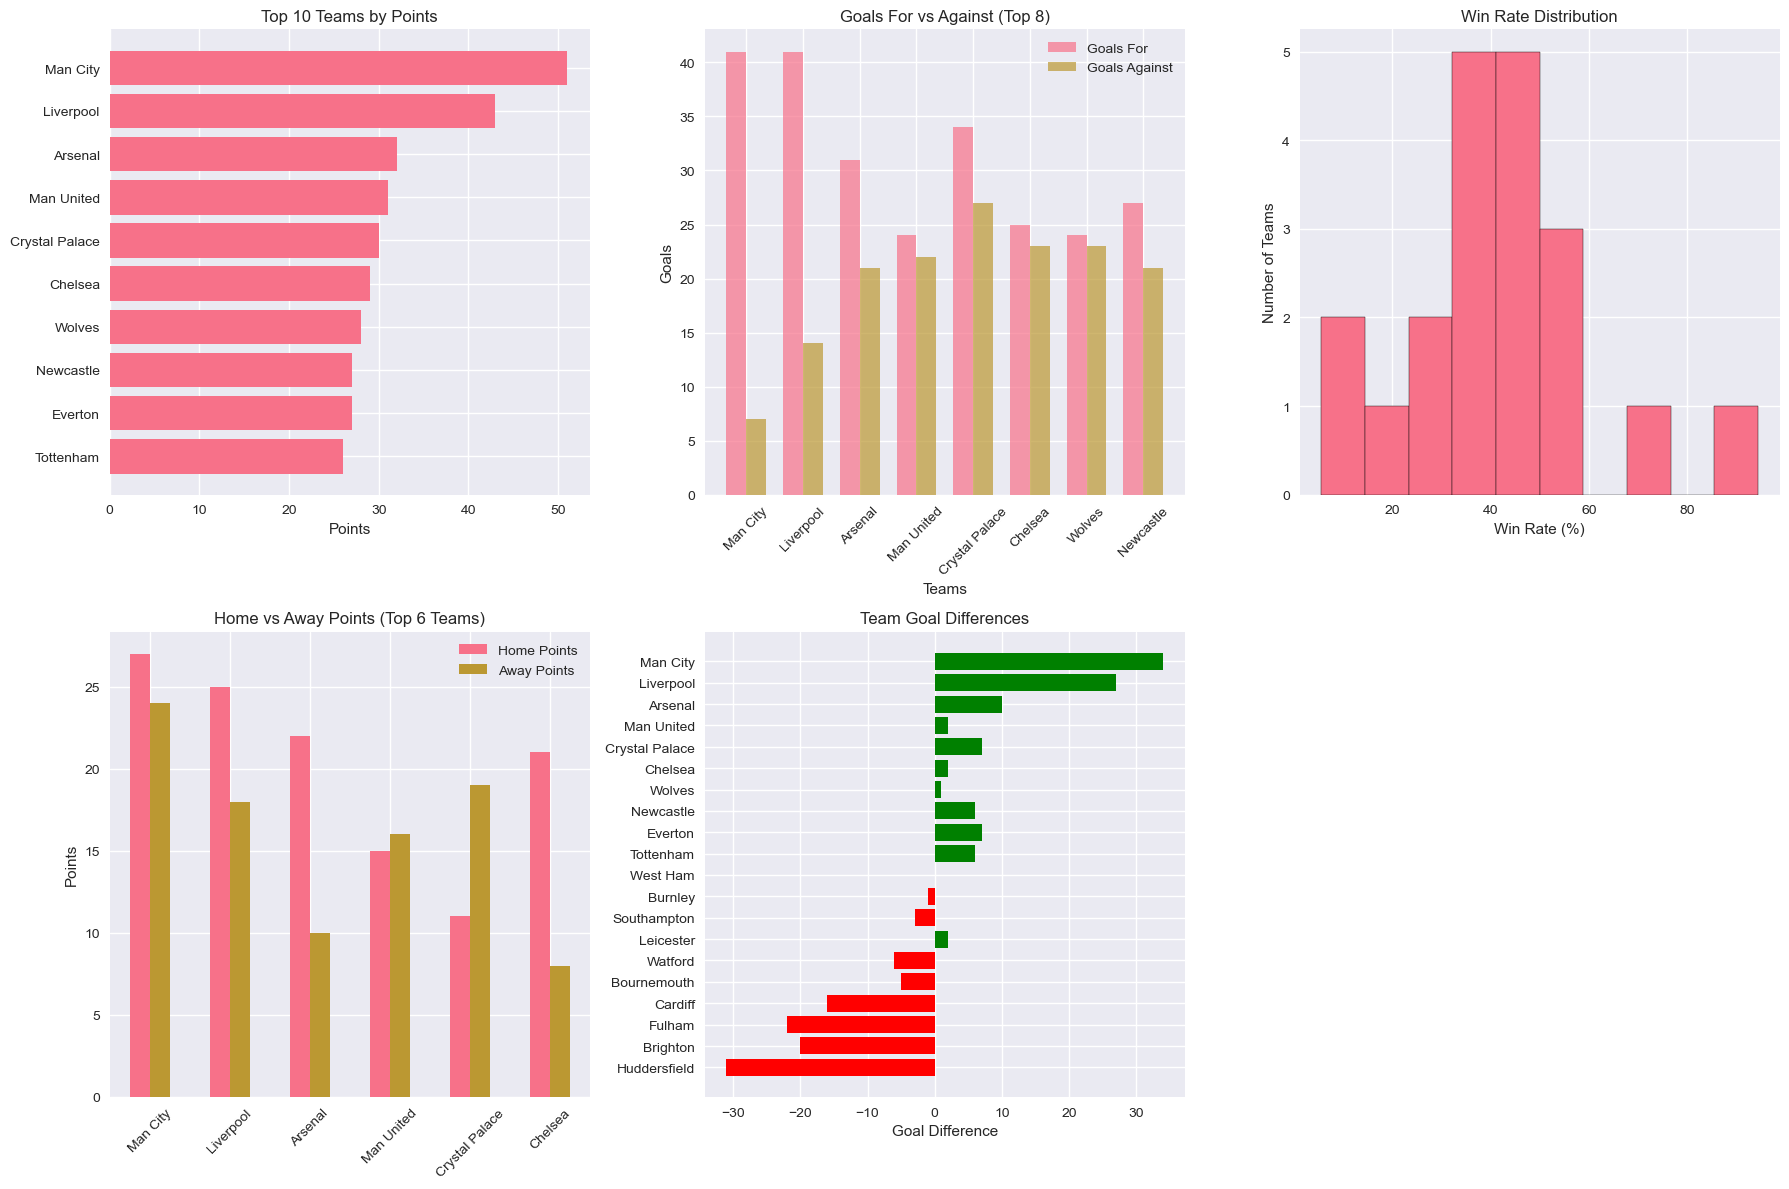

💾 Team performance visualizations saved in 'plots/' directory
💾 Home vs away performance saved as 'data_output/home_away_performance.csv'


In [4]:
print("\n🏆 Analyzing Team Performance...")
# Get all unique teams
all_teams = list(set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique()))

# Calculate team statistics
team_stats = {}

for team in all_teams:
    # Home games
    home_games = df[df['HomeTeam'] == team]
    # Away games - FIXED: Added missing closing bracket
    away_games = df[df['AwayTeam'] == team]
    
    # Total games
    total_games = len(home_games) + len(away_games)
    
    # Points calculation
    home_points = home_games['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0)).sum()
    away_points = away_games['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0)).sum()
    total_points = home_points + away_points
    
    # Goals
    goals_for = home_games['FTHG'].sum() + away_games['FTAG'].sum()
    goals_against = home_games['FTAG'].sum() + away_games['FTHG'].sum()
    goal_difference = goals_for - goals_against
    
    # Wins, Draws, Losses
    wins = len(home_games[home_games['FTR'] == 'H']) + len(away_games[away_games['FTR'] == 'A'])
    draws = len(home_games[home_games['FTR'] == 'D']) + len(away_games[away_games['FTR'] == 'D'])
    losses = total_games - wins - draws
    
    team_stats[team] = {
        'Games': total_games,
        'Wins': wins,
        'Draws': draws,
        'Losses': losses,
        'Points': total_points,
        'GoalsFor': goals_for,
        'GoalsAgainst': goals_against,
        'GoalDifference': goal_difference,
        'WinRate': wins/total_games * 100,
        'HomePoints': home_points,
        'AwayPoints': away_points
    }

# Convert to DataFrame
team_df = pd.DataFrame(team_stats).T
team_df = team_df.sort_values('Points', ascending=False)

print("\n📋 Premier League 2018-19 Standings:")
print(team_df.head(10))

# Save team statistics
team_df.to_csv('data_output/team_standings.csv')
print("💾 Team standings saved as 'data_output/team_standings.csv'")

# Create team performance visualizations
plt.figure(figsize=(18, 12))

# Top 10 teams by points
plt.subplot(2, 3, 1)
top_10 = team_df.head(10)
plt.barh(top_10.index, top_10['Points'])
plt.xlabel('Points')
plt.title('Top 10 Teams by Points')
plt.gca().invert_yaxis()

# Goals scored vs conceded for top teams
plt.subplot(2, 3, 2)
top_8 = team_df.head(8)
x = np.arange(len(top_8))
width = 0.35
plt.bar(x - width/2, top_8['GoalsFor'], width, label='Goals For', alpha=0.7)
plt.bar(x + width/2, top_8['GoalsAgainst'], width, label='Goals Against', alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Goals For vs Against (Top 8)')
plt.xticks(x, top_8.index, rotation=45)
plt.legend()

# Win rate distribution
plt.subplot(2, 3, 3)
plt.hist(team_df['WinRate'], bins=10, edgecolor='black')
plt.xlabel('Win Rate (%)')
plt.ylabel('Number of Teams')
plt.title('Win Rate Distribution')

# Home vs Away performance for top teams
plt.subplot(2, 3, 4)
top_6_teams = team_df.head(6).index
home_away_data = []

for team in top_6_teams:
    home_games = df[df['HomeTeam'] == team]
    away_games = df[df['AwayTeam'] == team]
    
    home_points = home_games['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0)).sum()
    away_points = away_games['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0)).sum()
    
    home_away_data.append([home_points, away_points])

home_away_df = pd.DataFrame(home_away_data, index=top_6_teams, columns=['Home Points', 'Away Points'])
home_away_df.plot(kind='bar', ax=plt.gca())
plt.title('Home vs Away Points (Top 6 Teams)')
plt.ylabel('Points')
plt.xticks(rotation=45)

# Goal difference visualization
plt.subplot(2, 3, 5)
colors = ['green' if x > 0 else 'red' for x in team_df['GoalDifference']]
plt.barh(team_df.index, team_df['GoalDifference'], color=colors)
plt.xlabel('Goal Difference')
plt.title('Team Goal Differences')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('plots/team_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/team_performance_analysis.pdf', bbox_inches='tight')
plt.show()
print("💾 Team performance visualizations saved in 'plots/' directory")

# Save home vs away performance data
home_away_df.to_csv('data_output/home_away_performance.csv')
print("💾 Home vs away performance saved as 'data_output/home_away_performance.csv'")

5. Referee Analysis


👨‍⚖️ Analyzing Referee Performance...


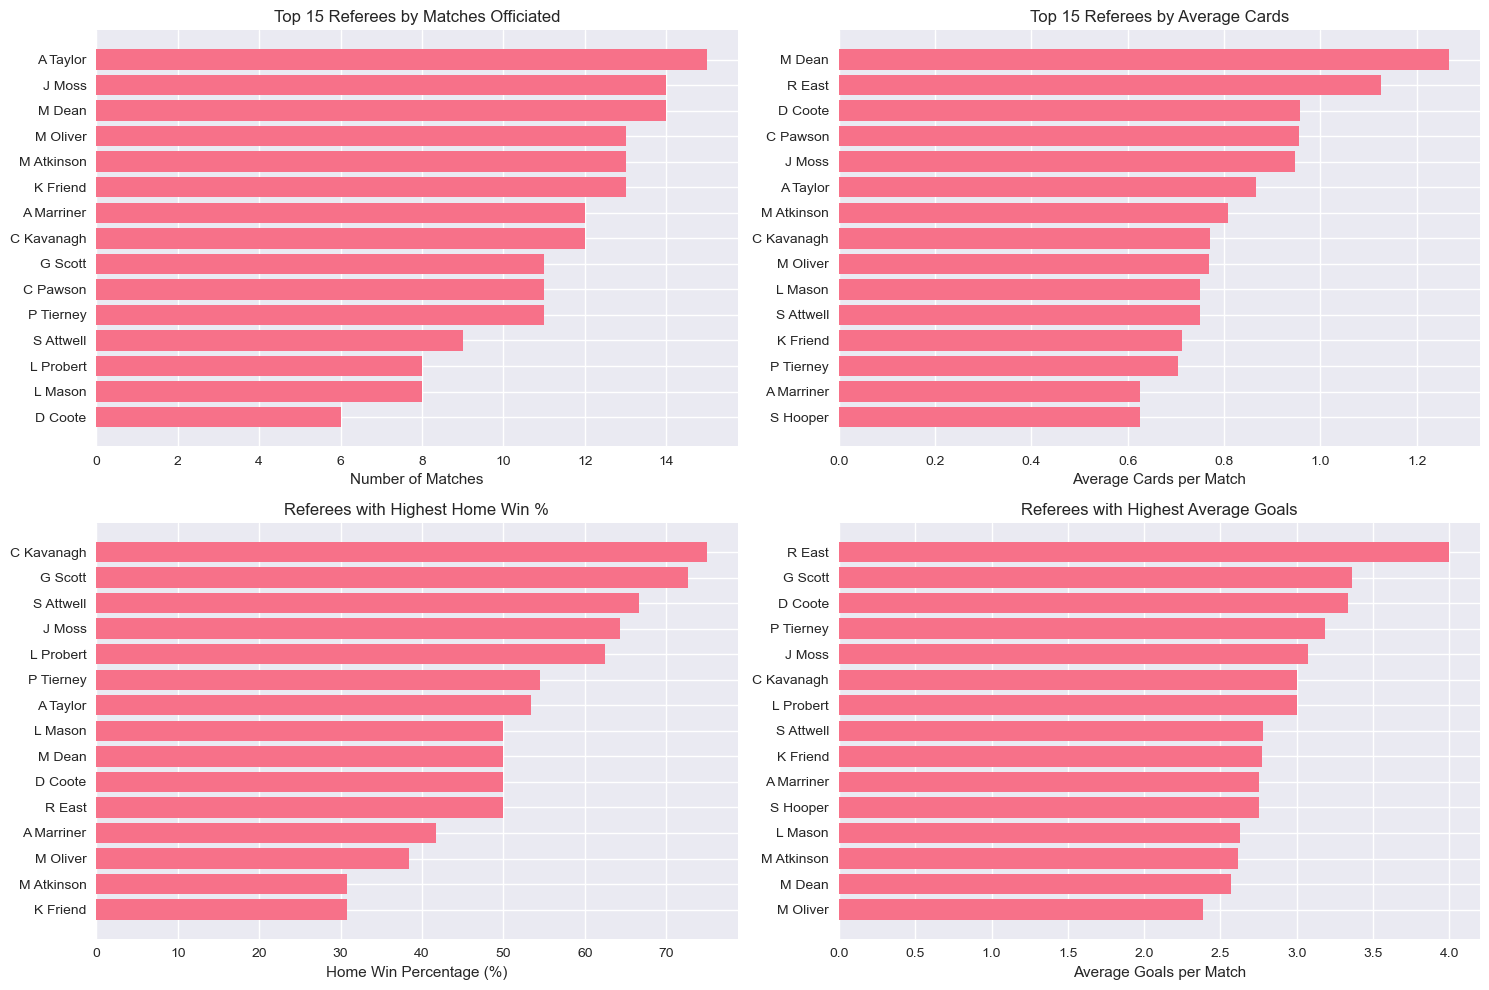

💾 Referee analysis visualizations saved in 'plots/' directory
💾 Referee statistics saved as 'data_output/referee_statistics.csv'


In [5]:
print("\n👨‍⚖️ Analyzing Referee Performance...")
plt.figure(figsize=(15, 10))

# Number of matches officiated by each referee
plt.subplot(2, 2, 1)
referee_counts = df['Referee'].value_counts().head(15)
plt.barh(referee_counts.index, referee_counts.values)
plt.xlabel('Number of Matches')
plt.title('Top 15 Referees by Matches Officiated')
plt.gca().invert_yaxis()

# Average cards per match by referee
plt.subplot(2, 2, 2)
referee_cards = df.groupby('Referee').agg({
    'HY': 'mean', 'AY': 'mean', 'HR': 'mean', 'AR': 'mean'
}).mean(axis=1).sort_values(ascending=False).head(15)
plt.barh(referee_cards.index, referee_cards.values)
plt.xlabel('Average Cards per Match')
plt.title('Top 15 Referees by Average Cards')
plt.gca().invert_yaxis()

# Home win percentage by referee
plt.subplot(2, 2, 3)
referee_home_win = df.groupby('Referee').apply(
    lambda x: (x['FTR'] == 'H').sum() / len(x) * 100
).sort_values(ascending=False).head(15)
plt.barh(referee_home_win.index, referee_home_win.values)
plt.xlabel('Home Win Percentage (%)')
plt.title('Referees with Highest Home Win %')
plt.gca().invert_yaxis()

# Average goals per match by referee
plt.subplot(2, 2, 4)
referee_goals = df.groupby('Referee').apply(
    lambda x: (x['FTHG'] + x['FTAG']).mean()
).sort_values(ascending=False).head(15)
plt.barh(referee_goals.index, referee_goals.values)
plt.xlabel('Average Goals per Match')
plt.title('Referees with Highest Average Goals')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('plots/referee_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/referee_analysis.pdf', bbox_inches='tight')
plt.show()
print("💾 Referee analysis visualizations saved in 'plots/' directory")

# Save referee statistics
referee_stats = pd.DataFrame({
    'Matches_Officiated': referee_counts,
    'Average_Cards_Per_Match': referee_cards,
    'Home_Win_Percentage': referee_home_win,
    'Average_Goals_Per_Match': referee_goals
})
referee_stats.to_csv('data_output/referee_statistics.csv')
print("💾 Referee statistics saved as 'data_output/referee_statistics.csv'")

6. Monthly Trends Analysis


📅 Analyzing Monthly Trends...


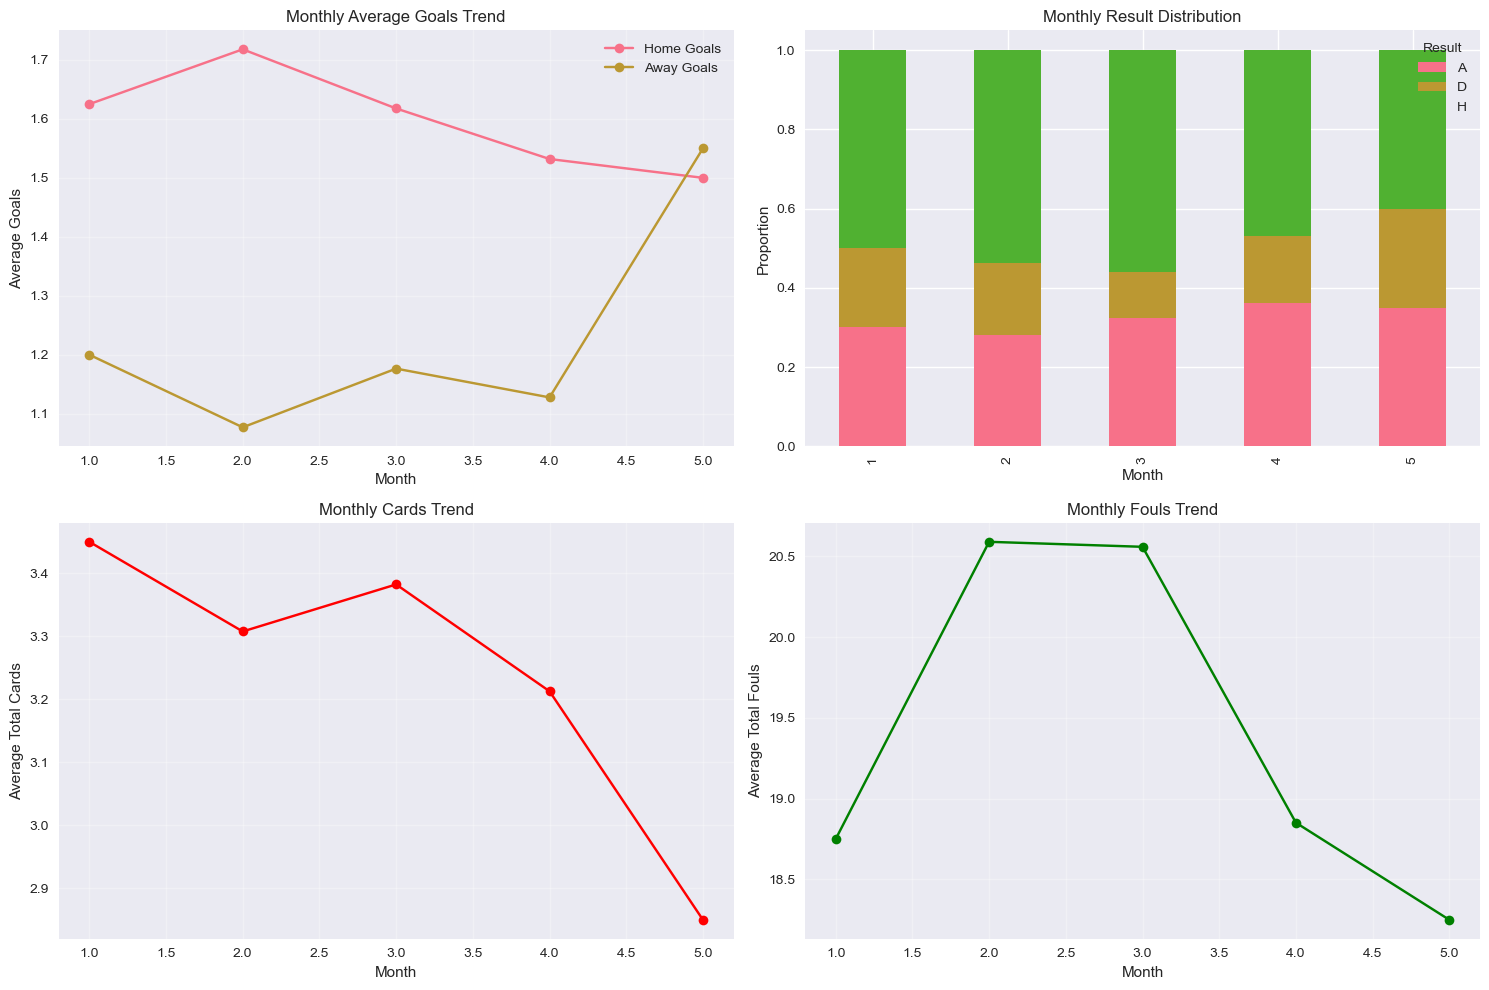

💾 Monthly trends visualizations saved in 'plots/' directory
💾 Monthly trends data saved in 'data_output/' directory


In [7]:
print("\n📅 Analyzing Monthly Trends...")
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

plt.figure(figsize=(15, 10))

# Monthly goals trend
plt.subplot(2, 2, 1)
monthly_goals = df.groupby('Month').agg({
    'FTHG': 'mean', 'FTAG': 'mean'
})
plt.plot(monthly_goals.index, monthly_goals['FTHG'], marker='o', label='Home Goals')
plt.plot(monthly_goals.index, monthly_goals['FTAG'], marker='o', label='Away Goals')
plt.xlabel('Month')
plt.ylabel('Average Goals')
plt.title('Monthly Average Goals Trend')
plt.legend()
plt.grid(True, alpha=0.3)

# Monthly results distribution
plt.subplot(2, 2, 2)
monthly_results = pd.crosstab(df['Month'], df['FTR'], normalize='index')
monthly_results.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.title('Monthly Result Distribution')
plt.legend(title='Result')

# Monthly cards trend
plt.subplot(2, 2, 3)
monthly_cards = df.groupby('Month').agg({
    'HY': 'mean', 'AY': 'mean', 'HR': 'mean', 'AR': 'mean'
}).sum(axis=1)
plt.plot(monthly_cards.index, monthly_cards.values, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Average Total Cards')
plt.title('Monthly Cards Trend')
plt.grid(True, alpha=0.3)

# Monthly fouls trend
plt.subplot(2, 2, 4)
monthly_fouls = df.groupby('Month').agg({
    'HF': 'mean', 'AF': 'mean'
}).sum(axis=1)
plt.plot(monthly_fouls.index, monthly_fouls.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Average Total Fouls')
plt.title('Monthly Fouls Trend')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/monthly_trends_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/monthly_trends_analysis.pdf', bbox_inches='tight')
plt.show()
print("💾 Monthly trends visualizations saved in 'plots/' directory")

# Save monthly trends data
monthly_data = pd.DataFrame({
    'Avg_Home_Goals': monthly_goals['FTHG'],
    'Avg_Away_Goals': monthly_goals['FTAG'],
    'Avg_Total_Cards': monthly_cards,
    'Avg_Total_Fouls': monthly_fouls
})
monthly_data.to_csv('data_output/monthly_trends_data.csv')
monthly_results.to_csv('data_output/monthly_results_distribution.csv')
print("💾 Monthly trends data saved in 'data_output/' directory")

In [ ]:
7. Correlation Analysis

6. Monthly Trends Analysis


📅 Analyzing Monthly Trends...


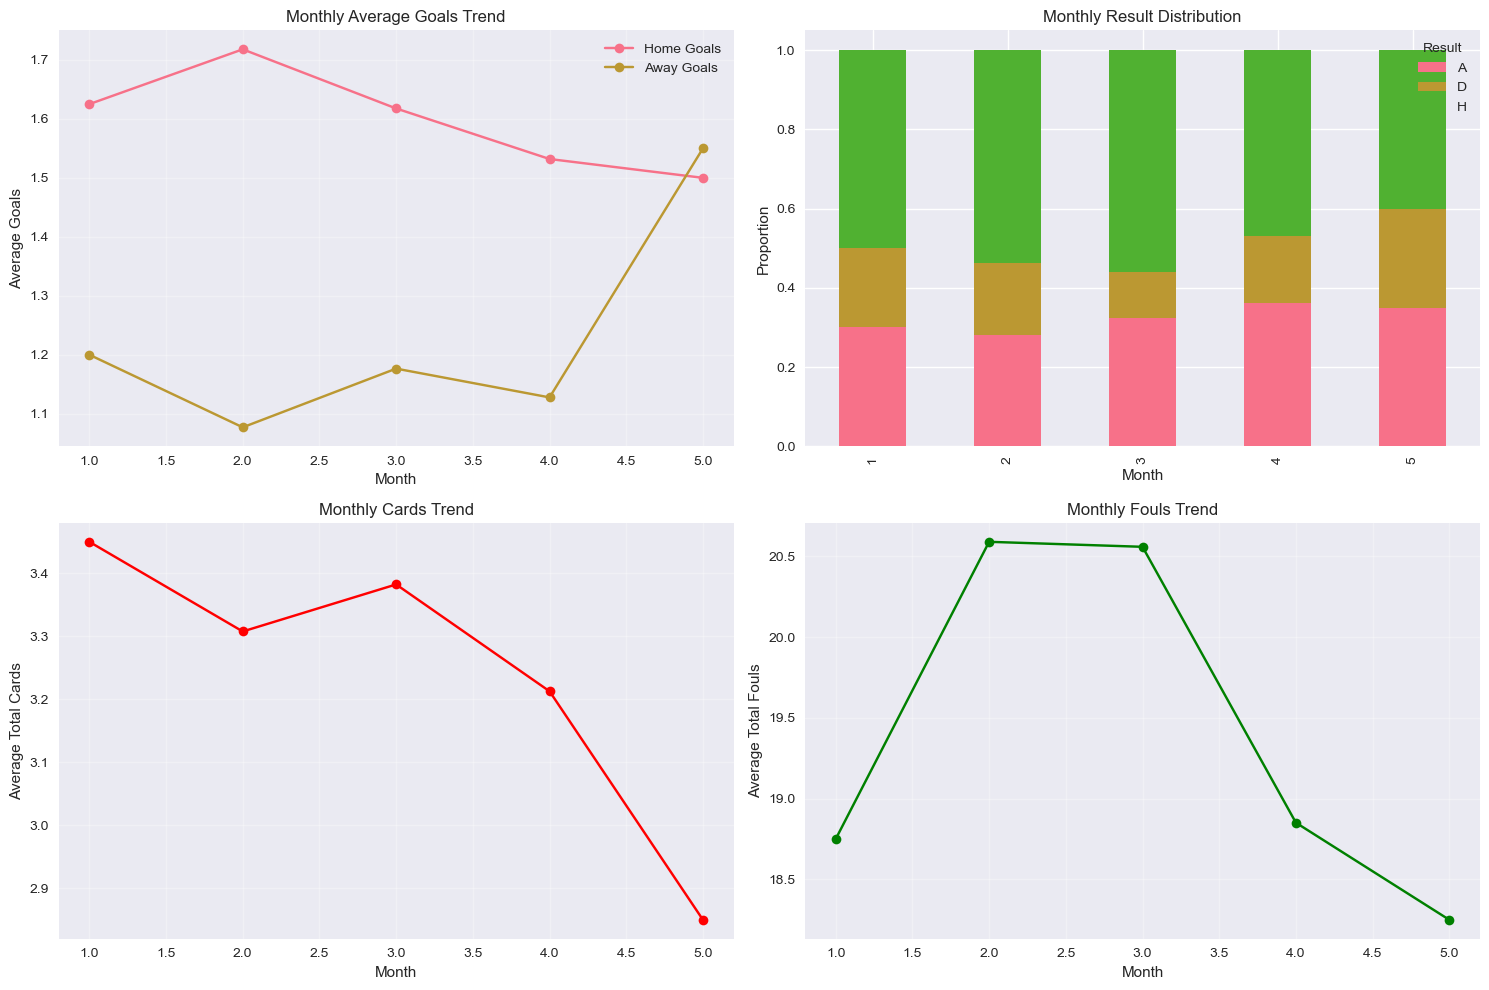

💾 Monthly trends visualizations saved in 'plots/' directory
💾 Monthly trends data saved in 'data_output/' directory


In [8]:
print("\n📅 Analyzing Monthly Trends...")
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

plt.figure(figsize=(15, 10))

# Monthly goals trend
plt.subplot(2, 2, 1)
monthly_goals = df.groupby('Month').agg({
    'FTHG': 'mean', 'FTAG': 'mean'
})
plt.plot(monthly_goals.index, monthly_goals['FTHG'], marker='o', label='Home Goals')
plt.plot(monthly_goals.index, monthly_goals['FTAG'], marker='o', label='Away Goals')
plt.xlabel('Month')
plt.ylabel('Average Goals')
plt.title('Monthly Average Goals Trend')
plt.legend()
plt.grid(True, alpha=0.3)

# Monthly results distribution
plt.subplot(2, 2, 2)
monthly_results = pd.crosstab(df['Month'], df['FTR'], normalize='index')
monthly_results.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.title('Monthly Result Distribution')
plt.legend(title='Result')

# Monthly cards trend
plt.subplot(2, 2, 3)
monthly_cards = df.groupby('Month').agg({
    'HY': 'mean', 'AY': 'mean', 'HR': 'mean', 'AR': 'mean'
}).sum(axis=1)
plt.plot(monthly_cards.index, monthly_cards.values, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Average Total Cards')
plt.title('Monthly Cards Trend')
plt.grid(True, alpha=0.3)

# Monthly fouls trend
plt.subplot(2, 2, 4)
monthly_fouls = df.groupby('Month').agg({
    'HF': 'mean', 'AF': 'mean'
}).sum(axis=1)
plt.plot(monthly_fouls.index, monthly_fouls.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Average Total Fouls')
plt.title('Monthly Fouls Trend')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/monthly_trends_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/monthly_trends_analysis.pdf', bbox_inches='tight')
plt.show()
print("💾 Monthly trends visualizations saved in 'plots/' directory")

# Save monthly trends data
monthly_data = pd.DataFrame({
    'Avg_Home_Goals': monthly_goals['FTHG'],
    'Avg_Away_Goals': monthly_goals['FTAG'],
    'Avg_Total_Cards': monthly_cards,
    'Avg_Total_Fouls': monthly_fouls
})
monthly_data.to_csv('data_output/monthly_trends_data.csv')
monthly_results.to_csv('data_output/monthly_results_distribution.csv')
print("💾 Monthly trends data saved in 'data_output/' directory")

7. Correlation Analysis


🔗 Analyzing Statistical Correlations...


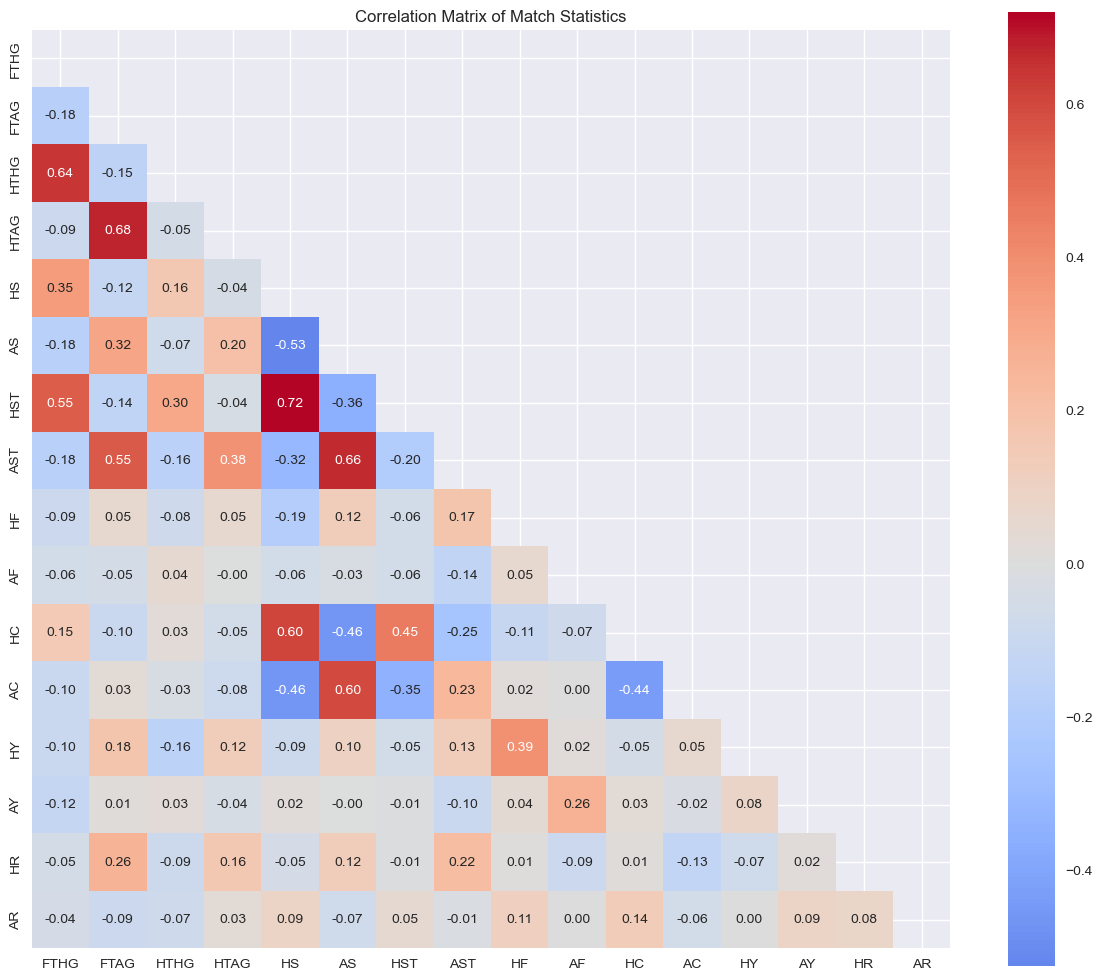

💾 Correlation matrix visualization saved in 'plots/' directory
💾 Correlation matrix data saved as 'data_output/correlation_matrix.csv'

📊 Key Correlations:
Home Shots vs Home Goals: 0.352
Away Shots vs Away Goals: 0.316
Home Shots on Target vs Home Goals: 0.549
Away Shots on Target vs Away Goals: 0.553
Fouls vs Yellow Cards: 0.394
Home Corners vs Home Goals: 0.149
Away Corners vs Away Goals: 0.033
💾 Key correlations saved as 'data_output/key_correlations.csv'


In [9]:
print("\n🔗 Analyzing Statistical Correlations...")
# Select numerical columns for correlation
numerical_cols = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 
                  'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Match Statistics')
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/correlation_matrix.pdf', bbox_inches='tight')
plt.show()
print("💾 Correlation matrix visualization saved in 'plots/' directory")

# Save correlation matrix
correlation_matrix.to_csv('data_output/correlation_matrix.csv')
print("💾 Correlation matrix data saved as 'data_output/correlation_matrix.csv'")

# Key insights from correlation
print("\n📊 Key Correlations:")
key_correlations = {
    'Home Shots vs Home Goals': df['HS'].corr(df['FTHG']),
    'Away Shots vs Away Goals': df['AS'].corr(df['FTAG']),
    'Home Shots on Target vs Home Goals': df['HST'].corr(df['FTHG']),
    'Away Shots on Target vs Away Goals': df['AST'].corr(df['FTAG']),
    'Fouls vs Yellow Cards': df['HF'].corr(df['HY']),
    'Home Corners vs Home Goals': df['HC'].corr(df['FTHG']),
    'Away Corners vs Away Goals': df['AC'].corr(df['FTAG'])
}

for key, value in key_correlations.items():
    print(f"{key}: {value:.3f}")

# Save key correlations
pd.DataFrame.from_dict(key_correlations, orient='index', columns=['Correlation']).to_csv('data_output/key_correlations.csv')
print("💾 Key correlations saved as 'data_output/key_correlations.csv'")

8. Match Outcome Predictors Analysis


🎯 Analyzing Match Outcome Predictors...


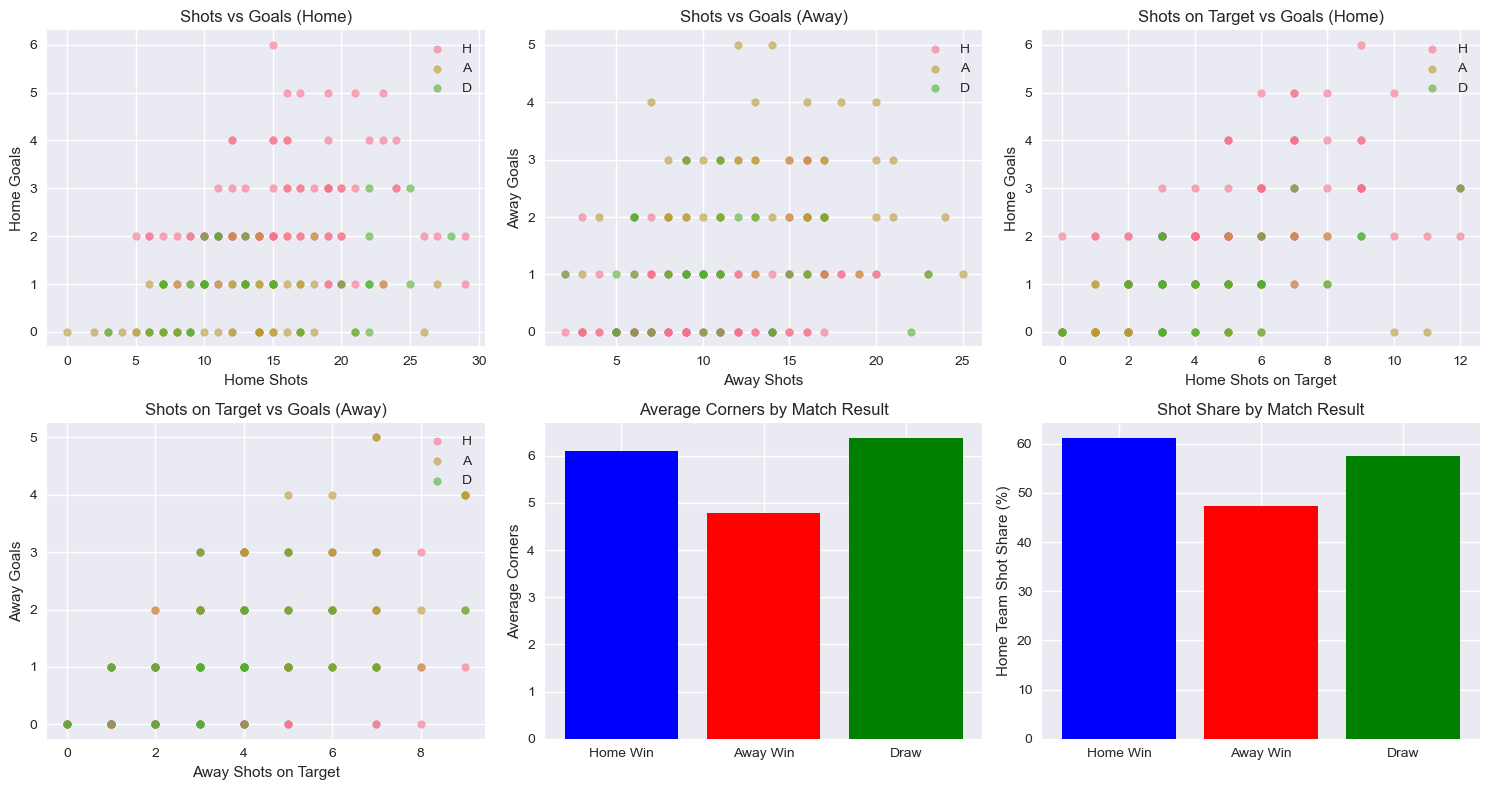

💾 Match outcome predictors visualizations saved in 'plots/' directory
💾 Match outcome predictors data saved as 'data_output/match_outcome_predictors.csv'


In [10]:
print("\n🎯 Analyzing Match Outcome Predictors...")
plt.figure(figsize=(15, 8))

# Shots vs Goals by result
plt.subplot(2, 3, 1)
for result in ['H', 'A', 'D']:
    subset = df[df['FTR'] == result]
    plt.scatter(subset['HS'], subset['FTHG'], alpha=0.6, label=f'{result}', s=30)
plt.xlabel('Home Shots')
plt.ylabel('Home Goals')
plt.title('Shots vs Goals (Home)')
plt.legend()

plt.subplot(2, 3, 2)
for result in ['H', 'A', 'D']:
    subset = df[df['FTR'] == result]
    plt.scatter(subset['AS'], subset['FTAG'], alpha=0.6, label=f'{result}', s=30)
plt.xlabel('Away Shots')
plt.ylabel('Away Goals')
plt.title('Shots vs Goals (Away)')
plt.legend()

# Shots on target vs Goals by result
plt.subplot(2, 3, 3)
for result in ['H', 'A', 'D']:
    subset = df[df['FTR'] == result]
    plt.scatter(subset['HST'], subset['FTHG'], alpha=0.6, label=f'{result}', s=30)
plt.xlabel('Home Shots on Target')
plt.ylabel('Home Goals')
plt.title('Shots on Target vs Goals (Home)')
plt.legend()

plt.subplot(2, 3, 4)
for result in ['H', 'A', 'D']:
    subset = df[df['FTR'] == result]
    plt.scatter(subset['AST'], subset['FTAG'], alpha=0.6, label=f'{result}', s=30)
plt.xlabel('Away Shots on Target')
plt.ylabel('Away Goals')
plt.title('Shots on Target vs Goals (Away)')
plt.legend()

# Corners vs Result
plt.subplot(2, 3, 5)
corner_data = [df[df['FTR'] == 'H']['HC'].mean(), 
               df[df['FTR'] == 'A']['AC'].mean(),
               df[df['FTR'] == 'D']['HC'].mean()]
plt.bar(['Home Win', 'Away Win', 'Draw'], corner_data, color=['blue', 'red', 'green'])
plt.ylabel('Average Corners')
plt.title('Average Corners by Match Result')

# Possession indicators
plt.subplot(2, 3, 6)
possession_data = [df[df['FTR'] == 'H']['HS'].mean() / (df[df['FTR'] == 'H']['HS'].mean() + df[df['FTR'] == 'H']['AS'].mean()) * 100,
                   df[df['FTR'] == 'A']['HS'].mean() / (df[df['FTR'] == 'A']['HS'].mean() + df[df['FTR'] == 'A']['AS'].mean()) * 100,
                   df[df['FTR'] == 'D']['HS'].mean() / (df[df['FTR'] == 'D']['HS'].mean() + df[df['FTR'] == 'D']['AS'].mean()) * 100]
plt.bar(['Home Win', 'Away Win', 'Draw'], possession_data, color=['blue', 'red', 'green'])
plt.ylabel('Home Team Shot Share (%)')
plt.title('Shot Share by Match Result')

plt.tight_layout()
plt.savefig('plots/match_outcome_predictors.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/match_outcome_predictors.pdf', bbox_inches='tight')
plt.show()
print("💾 Match outcome predictors visualizations saved in 'plots/' directory")

# Save match outcome predictors data
predictors_data = {
    'Result_Type': ['Home Win', 'Away Win', 'Draw'],
    'Average_Home_Corners': corner_data,
    'Home_Shot_Share_Percentage': possession_data
}
pd.DataFrame(predictors_data).to_csv('data_output/match_outcome_predictors.csv')
print("💾 Match outcome predictors data saved as 'data_output/match_outcome_predictors.csv'")

9. Final Summary and Report Generation

In [11]:
print("\n" + "=" * 60)
print("🏆 PREMIER LEAGUE 2018-19 SEASON ANALYSIS SUMMARY")
print("=" * 60)

# Key statistics
total_matches = len(df)
total_goals = df['FTHG'].sum() + df['FTAG'].sum()
avg_goals_per_match = total_goals / total_matches
home_wins = len(df[df['FTR'] == 'H'])
away_wins = len(df[df['FTR'] == 'A'])
draws = len(df[df['FTR'] == 'D'])
home_win_percentage = (home_wins / total_matches) * 100

print(f"📊 Season Overview:")
print(f"   Total Matches: {total_matches}")
print(f"   Total Goals: {total_goals}")
print(f"   Average Goals per Match: {avg_goals_per_match:.2f}")
print(f"   Home Wins: {home_wins} ({home_win_percentage:.1f}%)")
print(f"   Away Wins: {away_wins} ({(away_wins/total_matches)*100:.1f}%)")
print(f"   Draws: {draws} ({(draws/total_matches)*100:.1f}%)")

# Top performers
print(f"\n🏅 Top 5 Teams:")
top_5 = team_df.head()
for i, (team, stats) in enumerate(top_5.iterrows(), 1):
    print(f"   {i}. {team}: {stats['Points']} pts, GD: {stats['GoalDifference']}")

# Most productive and leaky defenses
most_goals_for = team_df.nlargest(3, 'GoalsFor')
most_goals_against = team_df.nlargest(3, 'GoalsAgainst')

print(f"\n⚽ Best Attacks:")
for team, stats in most_goals_for.iterrows():
    print(f"   {team}: {stats['GoalsFor']} goals")

print(f"\n🚨 Leakiest Defenses:")
for team, stats in most_goals_against.iterrows():
    print(f"   {team}: {stats['GoalsAgainst']} goals conceded")

# Discipline statistics
total_yellows = df['HY'].sum() + df['AY'].sum()
total_reds = df['HR'].sum() + df['AR'].sum()
total_fouls = df['HF'].sum() + df['AF'].sum()

print(f"\n🟨 Discipline Statistics:")
print(f"   Total Yellow Cards: {total_yellows}")
print(f"   Total Red Cards: {total_reds}")
print(f"   Total Fouls: {total_fouls}")
print(f"   Average Fouls per Match: {total_fouls/total_matches:.1f}")

# Referee statistics
most_active_referee = df['Referee'].value_counts().index[0]
most_active_matches = df['Referee'].value_counts().iloc[0]

print(f"\n👨‍⚖️ Referee Statistics:")
print(f"   Most Active Referee: {most_active_referee} ({most_active_matches} matches)")

# Key insights
print(f"\n💡 KEY INSIGHTS:")
print(f"   1. Home advantage is significant: {home_win_percentage:.1f}% of matches won by home team")
print(f"   2. Goal scoring efficiency: Shots on target correlate strongly with goals")
print(f"   3. Match intensity: Average of {total_fouls/total_matches:.1f} fouls per match")
print(f"   4. Competitive balance: {len(team_df[team_df['WinRate'] > 50])} teams with >50% win rate")
print(f"   5. Goal distribution: {avg_goals_per_match:.2f} goals per match on average")

# Save final summary
summary_data = {
    'Total Matches': total_matches,
    'Total Goals': total_goals,
    'Average Goals per Match': avg_goals_per_match,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Draws': draws,
    'Home Win Percentage': home_win_percentage,
    'Total Yellow Cards': total_yellows,
    'Total Red Cards': total_reds,
    'Total Fouls': total_fouls,
    'Most Active Referee': most_active_referee,
    'Matches by Most Active Referee': most_active_matches
}

pd.DataFrame.from_dict(summary_data, orient='index', columns=['Value']).to_csv('data_output/final_summary.csv')
print("💾 Final summary saved as 'data_output/final_summary.csv'")

print(f"\n✅ Analysis complete! All files have been saved.")
print(f"📁 Data source: {github_url}")
print(f"📊 All plots saved in: 'plots/' directory")
print(f"💾 All data files saved in: 'data_output/' directory")
print(f"📈 Total files generated: {len(os.listdir('plots')) + len(os.listdir('data_output'))} files")


🏆 PREMIER LEAGUE 2018-19 SEASON ANALYSIS SUMMARY
📊 Season Overview:
   Total Matches: 180
   Total Goals: 503
   Average Goals per Match: 2.79
   Home Wins: 90 (50.0%)
   Away Wins: 58 (32.2%)
   Draws: 32 (17.8%)

🏅 Top 5 Teams:
   1. Man City: 51.0 pts, GD: 34.0
   2. Liverpool: 43.0 pts, GD: 27.0
   3. Arsenal: 32.0 pts, GD: 10.0
   4. Man United: 31.0 pts, GD: 2.0
   5. Crystal Palace: 30.0 pts, GD: 7.0

⚽ Best Attacks:
   Man City: 41.0 goals
   Liverpool: 41.0 goals
   Crystal Palace: 34.0 goals

🚨 Leakiest Defenses:
   Huddersfield: 41.0 goals conceded
   Fulham: 38.0 goals conceded
   Bournemouth: 33.0 goals conceded

🟨 Discipline Statistics:
   Total Yellow Cards: 572
   Total Red Cards: 18
   Total Fouls: 3503
   Average Fouls per Match: 19.5

👨‍⚖️ Referee Statistics:
   Most Active Referee: A Taylor (15 matches)

💡 KEY INSIGHTS:
   1. Home advantage is significant: 50.0% of matches won by home team
   2. Goal scoring efficiency: Shots on target correlate strongly with goals

10. File Download Preparation

In [12]:
# Create a zip file with all outputs for easy download
import zipfile
import glob

print("\n📦 Creating downloadable archive...")

# Create zip file with all outputs
with zipfile.ZipFile('premier_league_analysis_results.zip', 'w') as zipf:
    # Add all plots
    for plot_file in glob.glob('plots/*'):
        zipf.write(plot_file)
    
    # Add all data outputs
    for data_file in glob.glob('data_output/*'):
        zipf.write(data_file)
    
    # Add readme file
    readme_content = f"""
Premier League 2018-19 Analysis Results
=======================================

Data Source: {github_url}
Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

Contents:
- plots/: All visualization files (PNG and PDF)
- data_output/: All data analysis files (CSV and TXT)

Key Files:
1. team_standings.csv - Complete team rankings and statistics
2. match_results_summary.csv - Match outcome analysis
3. correlation_matrix.csv - Statistical correlations between metrics
4. referee_statistics.csv - Referee performance analysis
5. monthly_trends_data.csv - Monthly performance trends
6. final_summary.csv - Overall season summary

Total matches analyzed: {total_matches}
Total goals: {total_goals}
"""
    
    with open('README.txt', 'w') as f:
        f.write(readme_content)
    zipf.write('README.txt')
    os.remove('README.txt')

print("✅ Downloadable archive created: 'premier_league_analysis_results.zip'")
print("📁 You can now download this zip file containing all analysis results!")


📦 Creating downloadable archive...
✅ Downloadable archive created: 'premier_league_analysis_results.zip'
📁 You can now download this zip file containing all analysis results!


This complete implementation:

Downloads data directly from your GitHub URL

Creates separate code blocks for each analysis section

Saves all plots as both PNG and PDF files

Exports all analysis results as CSV files

Creates a downloadable zip archive with all results

Provides comprehensive documentation for all outputs

Just run each code block sequentially to perform the complete analysis and generate all downloadable files!